# Capstone Project: The Battle of Neighbourhoods 

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

This report is presented in the following parts as shown below:

<a href='#part1'>1. Introduction</a>
<br>
<a href='#part2'>2. Data</a>
<br>
<a href='#part3'>3. Methodology</a>
<br>
<a href='#part4'>4. Result</a>
<br>
<a href='#part5'>5. Discussion and Conclusion</a>

</div>

## 1. Introduction

### 1.1 Description of the Problem

The population of London grew considerably over the last decades and in consequence grew very diverse. In London, as you can get fresh food supplies from all over the world, one begins to wonder how efficient the supply mechanism is. 

The real deal is that as much as there are many fine restaurants in London – Asian, Middle Eastern, Latin and American restaurants, you can struggle to find a good place to dine in the finest of West African cuisine that has a combination of Nigerian, Ghanaian, Cameroonian, Senegalese and more. 

### 1.2 Discussion of the Background

Our client, a successful restaurant chain in Africa is looking to expand operation in Europe through London. They want to create a high-end restaurant that comes with organic mix and healthy. Their target is not only West Africans, but they are pro-organic and healthy eating. To them, the client should be served as a king.

Since the London demography is so big, our client needs deeper insight from available data in order to decide where to establish the first Europe “royal” restaurant. This company spends a lot on research and provides customers with data insight into the ingredients used at restaurants.

### 1.3 Target Audience

The target audience is broad, it ranges from Londoners, tourists and those who are passionate about organic food.

## 2. Data

### 2.1 Description of Data

This project will rely on public data from Wikipedia and Foursquare.

#### 2.1.1 Dataset 1:

Considering the diversity of London, there is a high multicultural sense. London is a place where different shades live. As such, in the search for a high-end African-inclined restaurant, there is a high shortage.

The London Area consists of 32 Boroughs and the "City of London". Our data will be from the link: __[List of areas of London](https://en.wikipedia.org/wiki/List_of_areas_of_London)__

The web scrapping of the Wikipedia page for the London areas data is provided below:

In [1]:
# library for BeautifulSoup
from bs4 import BeautifulSoup

# library to handle data in a vectorized manner
import numpy as np

# library for data analsysis
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# library to handle JSON files
import json
print('numpy, pandas, ..., imported...')

!pip -q install geopy
# conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
print('geopy installed...')
# convert an address into latitude and longitude values
from geopy.geocoders import Nominatim
print('Nominatim imported...')

# library to handle requests
import requests
print('requests imported...')

# tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize
print('json_normalize imported...')

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
print('matplotlib imported...')

# import k-means from clustering stage
from sklearn.cluster import KMeans
print('Kmeans imported...')

# install the Geocoder
!pip -q install geocoder
import geocoder

# import time
import time

# !conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip -q install folium
print('folium installed...')
import folium # map rendering library
print('folium imported...')
print('...Done')

numpy, pandas, ..., imported...
geopy installed...
Nominatim imported...
requests imported...
json_normalize imported...
matplotlib imported...
Kmeans imported...
folium installed...
folium imported...
...Done


In [2]:
wikipedia_link = 'https://en.wikipedia.org/wiki/List_of_areas_of_London'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:64.0) Gecko/20100101 Firefox/64.0'}
wikipedia_page = requests.get(wikipedia_link, headers = headers)
wikipedia_page

<Response [200]>

In [3]:
# Cleans html file
soup = BeautifulSoup(wikipedia_page.content, 'html.parser')
# This extracts the "tbody" within the table where class is "wikitable sortable"
table = soup.find('table', {'class':'wikitable sortable'}).tbody

In [4]:
# Extracts all "tr" (table rows) within the table above
rows = table.find_all('tr')

In [5]:
# Extracts the column headers, removes and replaces possible '\n' with space for the "th" tag
columns = [i.text.replace('\n', '')
           for i in rows[0].find_all('th')]

In [6]:
# Converts columns to pd dataframe
df = pd.DataFrame(columns = columns)
df

,Location,London borough,Post town,Postcode district,Dial code,OS grid ref


In [7]:
# Extracts every row with corresponding columns
# Then appends the values to the create pd dataframe "df"
# Please note that the first row (row[0]) is skipped because it is already the header
for i in range(1, len(rows)):
    tds = rows[i].find_all('td')
    
    
    if len(tds) == 7:
        values = [tds[0].text, tds[1].text, tds[2].text.replace('\n', ''.replace('\xa0','')), tds[3].text, tds[4].text.replace('\n', ''.replace('\xa0','')), tds[5].text.replace('\n', ''.replace('\xa0','')), tds[6].text.replace('\n', ''.replace('\xa0',''))]
    else:
        values = [td.text.replace('\n', '').replace('\xa0','') for td in tds]
        
        df = df.append(pd.Series(values, index = columns), ignore_index = True)

        df

In [8]:
df.head(5)

,Location,London borough,Post town,Postcode district,Dial code,OS grid ref
0,Abbey Wood,"Bexley, Greenwich [7]",LONDON,SE2,020,TQ465785
1,Acton,"Ealing, Hammersmith and Fulham[8]",LONDON,"W3, W4",020,TQ205805
2,Addington,Croydon[8],CROYDON,CR0,020,TQ375645
3,Addiscombe,Croydon[8],CROYDON,CR0,020,TQ345665
4,Albany Park,Bexley,"BEXLEY, SIDCUP","DA5, DA14",020,TQ478728


In [9]:
df = df.rename(index=str, columns = {'Location': 'Location', 'London\xa0borough': 'Borough', 'Post town': 'Post-town', 'Postcode\xa0district': 'Postcode', 'Dial\xa0code': 'Dial-code', 'OS grid ref': 'OSGridRef'})

In [10]:
df.head(5)

,Location,Borough,Post-town,Postcode,Dial-code,OSGridRef
0,Abbey Wood,"Bexley, Greenwich [7]",LONDON,SE2,020,TQ465785
1,Acton,"Ealing, Hammersmith and Fulham[8]",LONDON,"W3, W4",020,TQ205805
2,Addington,Croydon[8],CROYDON,CR0,020,TQ375645
3,Addiscombe,Croydon[8],CROYDON,CR0,020,TQ345665
4,Albany Park,Bexley,"BEXLEY, SIDCUP","DA5, DA14",020,TQ478728


Looking the data, under the `Borough`, there are borough names with `[]`. These are references extracted from the wiki page. So remove these, the following was done:

In [11]:
df['Borough'] = df['Borough'].map(lambda x: x.rstrip(']').rstrip('0123456789').rstrip('['))

In [12]:
df.shape

(533, 6)

In [13]:
df.head(5)

,Location,Borough,Post-town,Postcode,Dial-code,OSGridRef
0,Abbey Wood,"Bexley, Greenwich",LONDON,SE2,020,TQ465785
1,Acton,"Ealing, Hammersmith and Fulham",LONDON,"W3, W4",020,TQ205805
2,Addington,Croydon,CROYDON,CR0,020,TQ375645
3,Addiscombe,Croydon,CROYDON,CR0,020,TQ345665
4,Albany Park,Bexley,"BEXLEY, SIDCUP","DA5, DA14",020,TQ478728


London is big and due to the limitations in the number of calls for the Foursquare API, the following assumptions are made to confine this project to only South East London.

__Assumption 1:__ Where the Postcode are more than one, (for example, in `Acton`, there are 2 postcodes - `W3` and `W4`), the postcodes are spread to multi-rows and assigned the same values from the other columns.

In [14]:
df0 = df.drop('Postcode', axis=1).join(df['Postcode'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('Postcode'))

In [15]:
df0.head(5)

,Location,Borough,Post-town,Dial-code,OSGridRef,Postcode
0,Abbey Wood,"Bexley, Greenwich",LONDON,020,TQ465785,SE2
1,Acton,"Ealing, Hammersmith and Fulham",LONDON,020,TQ205805,W3
1,Acton,"Ealing, Hammersmith and Fulham",LONDON,020,TQ205805,W4
10,Angel,Islington,LONDON,020,TQ345665,EC1
10,Angel,Islington,LONDON,020,TQ345665,N1


In [16]:
df0.shape

(637, 6)

As seen above, there are separate rows for Postcodes - `W3`and `W4`; same goes for the others too.

__Assumption 2:__ From the data, only the 'Location', 'Borough', 'Postcode', 'Post-town' will be used for this project. So they are extracted into a new data frame.

In [17]:
df1 = df0[['Location', 'Borough', 'Postcode', 'Post-town']].reset_index(drop=True)

In [18]:
df1.head(5)

,Location,Borough,Postcode,Post-town
0,Abbey Wood,"Bexley, Greenwich",SE2,LONDON
1,Acton,"Ealing, Hammersmith and Fulham",W3,LONDON
2,Acton,"Ealing, Hammersmith and Fulham",W4,LONDON
3,Angel,Islington,EC1,LONDON
4,Angel,Islington,N1,LONDON


In [19]:
df1.shape

(637, 4)

__Assumption 3:__ Now, only the Boroughs with London Post-town will be used for our search of location. Therefore, all the non-post-town are dropped.

In [20]:
df2 = df1
df21 = df2[df2['Post-town'].str.contains('LONDON')]

In [21]:
df21.head(5)

,Location,Borough,Postcode,Post-town
0,Abbey Wood,"Bexley, Greenwich",SE2,LONDON
1,Acton,"Ealing, Hammersmith and Fulham",W3,LONDON
2,Acton,"Ealing, Hammersmith and Fulham",W4,LONDON
3,Angel,Islington,EC1,LONDON
4,Angel,Islington,N1,LONDON


In [22]:
df21.shape

(380, 4)

From assumption 3, there are now 380 instances, which is a drop from 638 because of the drop of non-London post-towns.

In [23]:
# Re-assigns the df21 to new dataframe without the Post-town
df3 = df21[['Location', 'Borough', 'Postcode']].reset_index(drop=True)

In [24]:
df3.head(10)

,Location,Borough,Postcode
0,Abbey Wood,"Bexley, Greenwich",SE2
1,Acton,"Ealing, Hammersmith and Fulham",W3
2,Acton,"Ealing, Hammersmith and Fulham",W4
3,Angel,Islington,EC1
4,Angel,Islington,N1
5,Church End,Brent,NW10
6,Church End,Barnet,N3
7,Clapham,"Lambeth, Wandsworth",SW4
8,Clerkenwell,Islington,EC1
9,Colindale,Barnet,NW9


In [25]:
df_london = df3
df_london.to_csv('LondonLocations.csv', index = False)

__Assumption 4:__ Due to its more diverse outlook, proximity to afro-caribbean markets and accessible facilities, only the South East areas of London will be considered for our analysis. The South East areas has postcodes starting with `SE`.

 So, first, we remove the whitesapaces at the start of some of the postcodes and then drop the other non-SE postcodes.

In [26]:
df_london.head(5)

,Location,Borough,Postcode
0,Abbey Wood,"Bexley, Greenwich",SE2
1,Acton,"Ealing, Hammersmith and Fulham",W3
2,Acton,"Ealing, Hammersmith and Fulham",W4
3,Angel,Islington,EC1
4,Angel,Islington,N1


In [27]:
df_london.Postcode = df_london.Postcode.str.strip()

In [28]:
df_london.head(5)

,Location,Borough,Postcode
0,Abbey Wood,"Bexley, Greenwich",SE2
1,Acton,"Ealing, Hammersmith and Fulham",W3
2,Acton,"Ealing, Hammersmith and Fulham",W4
3,Angel,Islington,EC1
4,Angel,Islington,N1


In [29]:
# New dataframe for South East London postcodes - df_se
df_se = df_london[df_london['Postcode'].str.startswith(('SE'))].reset_index(drop=True)

In [30]:
df_se.head(10)

,Location,Borough,Postcode
0,Abbey Wood,"Bexley, Greenwich",SE2
1,Crofton Park,Lewisham,SE4
2,Crossness,Bexley,SE2
3,Crystal Palace,Bromley,SE19
4,Crystal Palace,Bromley,SE20
5,Crystal Palace,Bromley,SE26
6,Denmark Hill,Southwark,SE5
7,Deptford,Lewisham,SE8
8,Dulwich,Southwark,SE21
9,East Dulwich,Southwark,SE22


Now, our data is ready. `df_se` is the data we will focus on.

__Assumption 5:__ This assumption will focus on the demography of London where there are predominantly more multicultural  groups. According to the proportion of races by London borough as seen in [Demography of London](https://en.wikipedia.org/wiki/Demography_of_London), the top 5 Black Africans or Caribbeans are shown below:

In [31]:
demograph_link = 'https://en.wikipedia.org/wiki/Demography_of_London'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:64.0) Gecko/20100101 Firefox/64.0'}
demograph_page = requests.get(demograph_link, headers = headers)
soup1 = BeautifulSoup(demograph_page.content, 'html.parser')
table1 = soup1.find('table', {'class':'wikitable sortable'}).tbody
rows1 = table1.find_all('tr')
columns1 = [i.text.replace('\n', '')
           for i in rows1[0].find_all('th')]

In [32]:
columns1

['Local authority', 'White', 'Mixed', 'Asian', 'Black', 'Other']

In [33]:
demo_london = pd.DataFrame(columns = columns1)

In [34]:
demo_london.head(5)

,Local authority,White,Mixed,Asian,Black,Other


In [35]:
for j in range(1, len(rows1)):
    tds1 = rows1[j].find_all('td')
    if len(tds1) == 7:
        values1 = [tds1[0].text, tds1[1].text, tds1[2].text.replace('\n', ''.replace('\xa0','')), tds1[3].text, tds1[4].text.replace('\n', ''.replace('\xa0','')), tds1[5].text.replace('\n', ''.replace('\xa0',''))]
    else:
        values1 = [td1.text.replace('\n', '').replace('\xa0','') for td1 in tds1]
        
        demo_london = demo_london.append(pd.Series(values1, index = columns1), ignore_index = True)

        demo_london

In [36]:
demo_london['Black'] = demo_london['Black'].astype('float')

In [37]:
demo_london_sorted = demo_london.sort_values(by='Black', ascending = False)

In [38]:
demo_london_sorted.head(5)

,Local authority,White,Mixed,Asian,Black,Other
22,Lewisham,53.5,7.4,9.3,27.2,2.6
27,Southwark,54.3,6.2,9.4,26.9,3.3
21,Lambeth,57.1,7.6,6.9,25.9,2.4
11,Hackney,54.7,6.4,10.5,23.1,5.3
7,Croydon,55.1,6.6,16.4,20.2,1.8


__Assumption 6:__ Our next assumption will be based on the top 5 areas will significantly high "Black", "Mixed" and other races. These leaves us with Lewisham, Southwark, Lambeth, Hackney and Croydon.

In [39]:
df_se

,Location,Borough,Postcode
0,Abbey Wood,"Bexley, Greenwich",SE2
1,Crofton Park,Lewisham,SE4
2,Crossness,Bexley,SE2
3,Crystal Palace,Bromley,SE19
4,Crystal Palace,Bromley,SE20
5,Crystal Palace,Bromley,SE26
6,Denmark Hill,Southwark,SE5
7,Deptford,Lewisham,SE8
8,Dulwich,Southwark,SE21
9,East Dulwich,Southwark,SE22


In [40]:
df_se_top = df_se[df_se['Borough'].isin(['Lewisham', 'Southwark', 'Lambeth', 'Hackney', 'Croydon'])].reset_index(drop=True)

Just to be sure with syntax, Hackney is in North London, so it will not be returned. The resulting dataframe is `df_se_top`.

In [41]:
df_se_top.head(5)

,Location,Borough,Postcode
0,Crofton Park,Lewisham,SE4
1,Denmark Hill,Southwark,SE5
2,Deptford,Lewisham,SE8
3,Dulwich,Southwark,SE21
4,East Dulwich,Southwark,SE22


In [42]:
df_se_top.shape

(46, 3)

In [43]:
df_se.shape

(80, 3)

So we have our working dataframe to be `df_se_top` to work with.

#### 2.1.2 Dataset 2:

In obtaining the location data of the locations, the `Geocoder` package is used with the `arcgis_geocoder` to obtain the latitude and longitude of the needed locations.

These will help to create a new dataframe that will be used subsequently for the South East London areas.

In [44]:
# Geocoder starts here
# Defining a function to use --> get_latlng()'''
def get_latlng(arcgis_geocoder):
    
    # Initialize the Location (lat. and long.) to "None"
    lat_lng_coords = None
    
    # While loop helps to create a continous run until all the location coordinates are geocoded
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, London, United Kingdom'.format(arcgis_geocoder))
        lat_lng_coords = g.latlng
    return lat_lng_coords
# Geocoder ends here

Testing the function above for a sample postcode - `SE2`.

In [45]:
sample = get_latlng('SE2')
sample

[51.492450000000076, 0.12127000000003818]

And reverse geocoding this, using the `geocodefarm geocoder`, gives the following:

In [46]:
gg = geocoder.geocodefarm(sample, method = 'reverse')
gg

<[OK] Geocodefarm - Reverse [Harrow Manor Way, London, SE2 9, United Kingdom]>

So, we are certain that the geocoder works fine. So we proceed to applying it to our dataframe `df_se_top`.

In [47]:
start = time.time()

postal_codes = df_se_top['Postcode']    
coordinates = [get_latlng(postal_code) for postal_code in postal_codes.tolist()]

end = time.time()
print("Time of execution: ", end - start, "seconds")

Time of execution:  27.179999351501465 seconds


Then we proceed to store the location data - latitude and longitude as follows. The obtained coordinates are then joined to `df_se_top`to create new data frame.

In [48]:
df_se_loc = df_se_top

# The obtained coordinates (latitude and longitude) are joined with the dataframe as shown
df_se_coordinates = pd.DataFrame(coordinates, columns = ['Latitude', 'Longitude'])
df_se_loc['Latitude'] = df_se_coordinates['Latitude']
df_se_loc['Longitude'] = df_se_coordinates['Longitude']

In [49]:
df_se_loc.head(5)

,Location,Borough,Postcode,Latitude,Longitude
0,Crofton Park,Lewisham,SE4,51.46268,-0.03558
1,Denmark Hill,Southwark,SE5,51.47480,-0.09313
2,Deptford,Lewisham,SE8,51.48114,-0.02467
3,Dulwich,Southwark,SE21,51.44100,-0.08897
4,East Dulwich,Southwark,SE22,51.45256,-0.07076


In [50]:
df_se_loc.to_csv('SELondonLocationsCoordinates.csv', index = False)

In [51]:
df_se_loc.shape

(46, 5)

#### 2.1.3 Dataset 3:

The Foursquare API will be used to obtain the South East London Area venues for the geographical location data . These will be used to explore the neighbourhoods of London acordingly.

The venues within the neighbourhoods of South East London like the areas's restaurants and proximity to amenities would be correlated. Also, accessibility and ease of supplies would be considered as it relates to venues.

To use the **Foursquare API**, we define the **Foursquare Credentials and Version** as shown below:

In [52]:
CLIENT_ID = '0MJA3NYYG3U2ZY1LTZN2OYEHS3Y3WVSON2GBSO3IL4EDYVIR' # your Foursquare ID
CLIENT_SECRET = 'WGWSAF2TKVUQPE3PD0N3EOITFVBY5EYP1VCZI3BMUG0ROUS5' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

<a id='part3'></a>

## 3. Methodology

### 3.1 Data Exploration

#### 3.1.1 Single Neighbourhood

An initial exploration of a single Neighbourhood within the London area was done to examine the Foursquare workability. The Lewisham Borough postcode `SE13` and Location - `Lewisham` is used for this.

In [53]:
# Resets the current index to a new
se_df = df_se_loc.reset_index().drop('index', axis = 1)

In [54]:
se_df.shape

(46, 5)

In [55]:
se_df

,Location,Borough,Postcode,Latitude,Longitude
0,Crofton Park,Lewisham,SE4,51.46268,-0.03558
1,Denmark Hill,Southwark,SE5,51.47480,-0.09313
2,Deptford,Lewisham,SE8,51.48114,-0.02467
3,Dulwich,Southwark,SE21,51.44100,-0.08897
4,East Dulwich,Southwark,SE22,51.45256,-0.07076
5,Elephant and Castle,Southwark,SE1,51.49960,-0.09613
6,Elephant and Castle,Southwark,SE11,51.49084,-0.11108
7,Elephant and Castle,Southwark,SE17,51.48764,-0.09542
8,Bankside,Southwark,SE1,51.49960,-0.09613
9,Forest Hill,Lewisham,SE23,51.44122,-0.04764


In [56]:
se_df.loc[se_df['Location'] == 'Lewisham']

,Location,Borough,Postcode,Latitude,Longitude
20,Lewisham,Lewisham,SE13,51.46196,-0.00754


Now, let's use the `Lewisham` with the index location **20**.

In [57]:
se_df.loc[20, 'Location']

'Lewisham'

In [58]:
lewisham_lat = se_df.loc[20, 'Latitude']
lewisham_long = se_df.loc[20, 'Longitude']
lewisham_loc = se_df.loc[20, 'Location']
lewisham_postcode = se_df.loc[20, 'Postcode']

print('The latitude and longitude values of {} with postcode {}, are {}, {}.'.format(lewisham_loc,
                                                                                         lewisham_postcode,
                                                                                         lewisham_lat,
                                                                                         lewisham_long))

The latitude and longitude values of Lewisham with postcode SE13, are 51.46196000000003, -0.007539999999949032.


Let's explore the top 100 venues that are within a 2000 metres radius of Lewisham.

And then, let's create the `GET` request `URL`, and then the `url` is named.

In [59]:
# Credentials are provided already for this part
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 2000 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    lewisham_lat, 
    lewisham_long, 
    radius, 
    LIMIT)

# displays URL
url

'https://api.foursquare.com/v2/venues/explore?&client_id=0MJA3NYYG3U2ZY1LTZN2OYEHS3Y3WVSON2GBSO3IL4EDYVIR&client_secret=WGWSAF2TKVUQPE3PD0N3EOITFVBY5EYP1VCZI3BMUG0ROUS5&v=20180605&ll=51.46196000000003,-0.007539999999949032&radius=2000&limit=100'

Then, send the `GET` request and examine the results.

In [60]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5dc32975a30619002cb2b2d7'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Lewisham Central',
  'headerFullLocation': 'Lewisham Central, London',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 184,
  'suggestedBounds': {'ne': {'lat': 51.47996001800005,
    'lng': 0.021296961190459426},
   'sw': {'lat': 51.44395998200002, 'lng': -0.03637696119035749}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '535823bc498ec8d8da9aad5f',
       'name': 'Street Feast Model Market',
       'location': {'address': '196 Lewisham High St',
        'crossStreet': 'entrance at Molesworth St',
        'lat': 51.46020945743763,
        'lng': -0.01

From the `results`, the necessary information needs to be obtained from **items** key. To do this, the **`get_category_type`** function is used from the Foursquare lab.

In [61]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

The result is then cleaned up from `json` to a structured **pandas** dataframe as shown below:

In [62]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

In [63]:
nearby_venues

,name,categories,lat,lng
0,Street Feast Model Market,Street Food Gathering,51.460209,-0.012199
1,Maggie's Kitchen,Café,51.465380,-0.011213
2,Levante restaurant,Restaurant,51.462072,-0.009491
3,Gennaro Delicatessan,Deli / Bodega,51.461765,-0.009726
4,Manor House Gardens,Park,51.456686,0.004684
5,Corte,Coffee Shop,51.459776,-0.011554
6,Budget Gym Lewisham,Gym,51.462687,-0.009891
7,Blackheath Farmers' Market,Farmers Market,51.465913,0.007945
8,Everest Curry King,Sri Lankan Restaurant,51.466012,-0.019656
9,Dirty South,Pub,51.458846,-0.002666


In [64]:
nearby_venues_lewisham_unique = nearby_venues['categories'].value_counts().to_frame(name='Count')

In [65]:
nearby_venues_lewisham_unique.head(5)

,Count
Pub,13
Café,10
Park,6
Gastropub,5
Garden,4


Interestingly, even though there are restaurants are the Lewisham area, they are not even in the top 5 venues. It should be noted that since we are limited by data availability, our perspectives will be on what we have.

In [66]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


So in this case, 100 venues were returned for Lewisham.

#### 3.1.2 Multiple Neighbourhoods

Now let's explore (Multiple) Neighborhoods in the South East London area.

To do this, the function `getNearbyVenues` is used and it's created to repeat the same process for all neighborhoods.

In [67]:
def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

The created function - `getNearbyVenues` is then used on each neighbourhoods. And creates a new dataframe called **`london_venues`**.

In [68]:
se_venues = getNearbyVenues(names=se_df['Location'],
                                   latitudes=se_df['Latitude'],
                                   longitudes=se_df['Longitude']
                                  )

Crofton Park
Denmark Hill
Deptford
Dulwich
East Dulwich
Elephant and Castle
Elephant and Castle
Elephant and Castle
Bankside
Forest Hill
Gipsy Hill
Gipsy Hill
Grove Park
Herne Hill
Hither Green
Honor Oak
Ladywell
Ladywell
Lambeth
Lee
Lewisham
New Cross
Newington
Newington
Nunhead
Oval
Bellingham
Peckham
Rotherhithe
Selhurst
Bermondsey
South Norwood
Southend
St Johns
Surrey Quays
Tulse Hill
Tulse Hill
Upper Norwood
Walworth
Blackheath
West Norwood
Brixton
Brockley
Camberwell
Catford
Chinbrook


In [69]:
se_venues.shape

(4263, 7)

In [70]:
len(se_venues)

4263

In [71]:
se_venues['Neighbourhood'].value_counts()
se_venues.to_csv('se_venues.csv')

In [72]:
se_venues.head(5)

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Crofton Park,51.46268,-0.03558,Saka Maka,51.464826,-0.036437,Indian Restaurant
1,Crofton Park,51.46268,-0.03558,The Orchard,51.463678,-0.035699,Gastropub
2,Crofton Park,51.46268,-0.03558,Brockley's Rock,51.459457,-0.033868,Fish & Chips Shop
3,Crofton Park,51.46268,-0.03558,Browns Of Brockley,51.464513,-0.037346,Coffee Shop
4,Crofton Park,51.46268,-0.03558,Masala Wala,51.465652,-0.036007,Pakistani Restaurant


The number of venues returned for each neighbourhoods is then explored as follows:

In [73]:
se_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Bankside,100,100,100,100,100,100
Bellingham,68,68,68,68,68,68
Bermondsey,100,100,100,100,100,100
Blackheath,98,98,98,98,98,98
Brixton,100,100,100,100,100,100
Brockley,100,100,100,100,100,100
Camberwell,100,100,100,100,100,100
Catford,68,68,68,68,68,68
Chinbrook,53,53,53,53,53,53


The next step is to check how many unique categories can be returned for the venues. See as follows:

In [74]:
print('There are {} uniques categories.'.format(len(se_venues['Venue Category'].unique())))

There are 194 uniques categories.


In [75]:
se_venue_unique_count = se_venues['Venue Category'].value_counts().to_frame(name='Count')

In [76]:
se_venue_unique_count.head(5)

,Count
Pub,435
Coffee Shop,307
Café,281
Park,206
Grocery Store,161


In [77]:
se_venue_unique_count.describe()

,Count
count,194.000000
mean,21.974227
std,48.917869
min,1.000000
25%,4.000000
50%,7.000000
75%,17.750000
max,435.000000


### 3.2 Clustering

For this section, the neighbourhoods in South East London will be clustered based on the processed data obtained above.

#### 3.2.1 Libraries

To get started, all the necessary libraries have been called in the libraries section above.

#### 3.2.2 Map Visualization

Using the `geopy` library, the latitude and longitude values of London is obtained.

In [78]:
address = 'London, United Kingdom'

geolocator = Nominatim(user_agent="ln_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London are 51.5073219, -0.1276474.


The `folium` library is then used to obtain the coordinates.

In [79]:
# df_london_coordinates
map_london = folium.Map(location = [latitude, longitude], zoom_start = 12)
map_london

The South East London neighbourhoods are then superimposed on top as shown below, still using the `folium`library. Please note due to the location of the South East Loondon, you might need to zoom to see the superimposed areas.

In [80]:
# Adding markers to map
for lat, lng, borough, loc in zip(se_df['Latitude'], 
                                  se_df['Longitude'],
                                  se_df['Borough'],
                                  se_df['Location']):
    label = '{} - {}'.format(loc, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_london)  
    
display(map_london)

In [81]:
type(se_df)

pandas.core.frame.DataFrame

#### 3.2.3 Analysing Each Neighborhood

In this section, the objective is to check and explore the venues in each neighbourhood.

#### One Hot Encoding

In [82]:
# one hot encoding
se_onehot = pd.get_dummies(se_venues[['Venue Category']], prefix = "", prefix_sep = "")

Then the `Neighbourhood`column is added back to the dataframe.

In [83]:
# add neighborhood column back to dataframe
se_onehot['Neighbourhood'] = se_venues['Neighbourhood'] 

Some re-arrangement - move the new Neighbourhood column to the first column.

In [84]:
# move neighborhood column to the first column
fixed_columns = [se_onehot.columns[-1]] + list(se_onehot.columns[:-1])
se_onehot = se_onehot[fixed_columns]

Therefore, the new one hot encoded dataframe is:

In [85]:
se_onehot.head(5)

,Neighbourhood,African Restaurant,American Restaurant,Antique Shop,Aquarium,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bakery,Bar,Beer Bar,Beer Garden,Beer Store,Bike Shop,Bistro,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Bus Station,Bus Stop,Café,Canal,Cantonese Restaurant,Caribbean Restaurant,Champagne Bar,Cheese Shop,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Discount Store,Distillery,Doner Restaurant,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Forest,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Himalayan Restaurant,Historic Site,History Museum,Hostel,Hotel,Hotel Bar,Hungarian Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Karaoke Bar,Kebab Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Modern European Restaurant,Monument / Landmark,Movie Theater,Museum,Music Venue,Nature Preserve,Nightclub,Observatory,Office,Okonomiyaki Restaurant,Outdoor Sculpture,Pakistani Restaurant,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Pool Hall,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Recreation Center,Restaurant,Road,Rugby Pitch,Sake Bar,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shopping Mall,Shopping Plaza,Skate Park,Soccer Field,Soccer Stadium,Social Club,Spanish Restaurant,Sporting Goods Shop,Sri Lankan Restaurant,Stadium,Steakhouse,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Track,Track Stadium,Trail,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Xinjiang Restaurant,Yoga Studio,Zoo Exhibit
0,Crofton Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Crofton Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Crofton Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [86]:
se_onehot.loc[se_onehot['African Restaurant'] != 0]

,Neighbourhood,African Restaurant,American Restaurant,Antique Shop,Aquarium,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bakery,Bar,Beer Bar,Beer Garden,Beer Store,Bike Shop,Bistro,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Bus Station,Bus Stop,Café,Canal,Cantonese Restaurant,Caribbean Restaurant,Champagne Bar,Cheese Shop,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Discount Store,Distillery,Doner Restaurant,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Forest,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Himalayan Restaurant,Historic Site,History Museum,Hostel,Hotel,Hotel Bar,Hungarian Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Karaoke Bar,Kebab Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Modern European Restaurant,Monument / Landmark,Movie Theater,Museum,Music Venue,Nature Preserve,Nightclub,Observatory,Office,Okonomiyaki Restaurant,Outdoor Sculpture,Pakistani Restaurant,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Pool Hall,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Recreation Center,Restaurant,Road,Rugby Pitch,Sake Bar,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shopping Mall,Shopping Plaza,Skate Park,Soccer Field,Soccer Stadium,Social Club,Spanish Restaurant,Sporting Goods Shop,Sri Lankan Restaurant,Stadium,Steakhouse,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Track,Track Stadium,Trail,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Xinjiang Restaurant,Yoga Studio,Zoo Exhibit
135,Denmark Hill,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
662,Elephant and Castle,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
742,Elephant and Castle,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [87]:
se_onehot.loc[se_onehot['Neighbourhood'] == 'Lewisham']

,Neighbourhood,African Restaurant,American Restaurant,Antique Shop,Aquarium,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bakery,Bar,Beer Bar,Beer Garden,Beer Store,Bike Shop,Bistro,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Bus Station,Bus Stop,Café,Canal,Cantonese Restaurant,Caribbean Restaurant,Champagne Bar,Cheese Shop,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Discount Store,Distillery,Doner Restaurant,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Forest,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Himalayan Restaurant,Historic Site,History Museum,Hostel,Hotel,Hotel Bar,Hungarian Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Karaoke Bar,Kebab Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Modern European Restaurant,Monument / Landmark,Movie Theater,Museum,Music Venue,Nature Preserve,Nightclub,Observatory,Office,Okonomiyaki Restaurant,Outdoor Sculpture,Pakistani Restaurant,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Pool Hall,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Recreation Center,Restaurant,Road,Rugby Pitch,Sake Bar,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shopping Mall,Shopping Plaza,Skate Park,Soccer Field,Soccer Stadium,Social Club,Spanish Restaurant,Sporting Goods Shop,Sri Lankan Restaurant,Stadium,Steakhouse,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Track,Track Stadium,Trail,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Xinjiang Restaurant,Yoga Studio,Zoo Exhibit
1900,Lewisham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1901,Lewisham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1902,Lewisham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
190

As can be seen from above, Lewisham with its demography has no African restaurants within the top spots.

In [88]:
se_onehot.to_csv('selondon_onehot.csv', index = False)

The new dataframe size is given below:

In [89]:
se_onehot.shape

(4263, 195)

#### Regrouping and Category Statistics

In [90]:
se_grouped = se_onehot.groupby('Neighbourhood').mean().reset_index()
se_grouped.head()

,Neighbourhood,African Restaurant,American Restaurant,Antique Shop,Aquarium,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bakery,Bar,Beer Bar,Beer Garden,Beer Store,Bike Shop,Bistro,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Bus Station,Bus Stop,Café,Canal,Cantonese Restaurant,Caribbean Restaurant,Champagne Bar,Cheese Shop,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Discount Store,Distillery,Doner Restaurant,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Forest,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Himalayan Restaurant,Historic Site,History Museum,Hostel,Hotel,Hotel Bar,Hungarian Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Karaoke Bar,Kebab Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Modern European Restaurant,Monument / Landmark,Movie Theater,Museum,Music Venue,Nature Preserve,Nightclub,Observatory,Office,Okonomiyaki Restaurant,Outdoor Sculpture,Pakistani Restaurant,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Pool Hall,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Recreation Center,Restaurant,Road,Rugby Pitch,Sake Bar,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shopping Mall,Shopping Plaza,Skate Park,Soccer Field,Soccer Stadium,Social Club,Spanish Restaurant,Sporting Goods Shop,Sri Lankan Restaurant,Stadium,Steakhouse,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Track,Track Stadium,Trail,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Xinjiang Restaurant,Yoga Studio,Zoo Exhibit
0,Bankside,0.00,0.000000,0.0,0.0,0.000000,0.01,0.03,0.0,0.0,0.0,0.0,0.0,0.030000,0.020000,0.01,0.0,0.00,0.01,0.01,0.0,0.0,0.000000,0.01,0.02,0.0,0.000000,0.010000,0.0,0.01,0.00,0.0,0.01,0.000000,0.0,0.000000,0.040000,0.100000,0.00,0.000000,0.01,0.01,0.00,0.00,0.01,0.000000,0.01,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.01,0.01,0.0,0.00,0.0,0.00,0.0,0.010000,0.000000,0.00,0.0,0.0,0.0,0.0,0.00,0.01,0.010000,0.0,0.010000,0.0,0.01,0.000000,0.00,0.010000,0.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.020000,0.010000,0.010000,0.0,0.0,0.000000,0.0,0.000000,0.01,0.0,0.050000,0.01,0.0,0.01,0.000000,0.00,0.0,0.000000,0.050000,0.000000,0.0,0.0,0.01,0.00,0.01,0.0,0.0,0.0,0.0,0.00,0.01,0.0,0.00,0.0,0.01,0.0,0.0,0.0,0.02,0.000000,0.0,0.000000,0.0,0.00,0.000000,0.0,0.000000,0.01,0.01,0.000000,0.000000,0.00,0.020000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.020000,0.060000,0.00,0.00,0.000000,0.010000,0.0,0.000000,0.0,0.000000,0.02,0.0,0.02,0.000000,0.000000,0.01,0.000000,0.000000,0.0,0.01,0.0,0.0,0.0,0.01,0.0,0.02,0.000000,0.0,0.00,0.01,0.000000,0.050000,0.0,0.0,0.000000,0.0,0.0,0.010000,0.000000,0.0,0.000000,0.01,0.01,0.000000,0.020000,0.0,0.00,0.00,0.000000
1,Bellingham,0.00,0.000000,0.0,0.

In [91]:
print("Before One-hot encoding:", se_df.shape)
print("After One-hot encoding:", se_grouped.shape)

Before One-hot encoding: (46, 5)
After One-hot encoding: (40, 195)


In [92]:
se_grouped.to_csv('london_grouped.csv', index = False)

Grouping of each Neighbourhoods with 10 common venues:

In [93]:
num_top_venues = 10 # Top common venues needed

for hood in se_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = se_grouped[se_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue', 'freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending = False).reset_index(drop = True).head(num_top_venues))
    print('\n')

----Bankside----
                venue  freq
0         Coffee Shop  0.10
1                 Pub  0.06
2             Theater  0.05
3  Italian Restaurant  0.05
4               Hotel  0.05
5        Cocktail Bar  0.04
6          Art Museum  0.03
7              Bakery  0.03
8  Seafood Restaurant  0.02
9       Grocery Store  0.02


----Bellingham----
                  venue  freq
0         Grocery Store  0.15
1                  Park  0.09
2           Supermarket  0.07
3                   Pub  0.06
4    Italian Restaurant  0.04
5  Fast Food Restaurant  0.04
6           Coffee Shop  0.04
7                  Café  0.04
8         Train Station  0.03
9           Gas Station  0.03


----Bermondsey----
                venue  freq
0         Coffee Shop  0.10
1                 Pub  0.06
2             Theater  0.05
3  Italian Restaurant  0.05
4               Hotel  0.05
5        Cocktail Bar  0.04
6          Art Museum  0.03
7              Bakery  0.03
8  Seafood Restaurant  0.02
9       Grocery Store  

#### Creating new dataframe:

Putting the common venues into pandas dataframe, the following `return_most_common_venues`is used to sort the venues in descending order.


In [94]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending = False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Then we create a new panda dataframe with 10 most common venues as shown below:

In [95]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = se_grouped['Neighbourhood']

for ind in np.arange(se_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(se_grouped.iloc[ind, :], num_top_venues)

In [96]:
neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bankside,Coffee Shop,Pub,Hotel,Italian Restaurant,Theater,Cocktail Bar,Bakery,Art Museum,Street Food Gathering,Music Venue
1,Bellingham,Grocery Store,Park,Supermarket,Pub,Fast Food Restaurant,Coffee Shop,Italian Restaurant,Café,Train Station,Gas Station
2,Bermondsey,Coffee Shop,Pub,Hotel,Italian Restaurant,Theater,Cocktail Bar,Bakery,Art Museum,Street Food Gathering,Music Venue
3,Blackheath,Pub,Coffee Shop,Grocery Store,Park,Café,Indian Restaurant,Bakery,Italian Restaurant,Garden,Supermarket
4,Brixton,Café,Coffee Shop,Park,Pub,Italian Restaurant,Cocktail Bar,Pizza Place,Bar,Beer Bar,Middle Eastern Restaurant


In [97]:
neighbourhoods_venues_sorted.to_csv('neighbourhoods_venues_sorted.csv', index = False)

In [98]:
se_grouped_clustering = se_grouped.drop('Neighbourhood', 1)

####  3.2.4 Clustering of Neighbourhoods

The next thing to do now, is to create clusters of the neighbourhood using the `k-means` to cluster the neighbourhood into 5 clusters.

In [99]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters = kclusters, random_state=0).fit(se_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 3, 0, 1, 4, 1, 4, 3, 2, 1], dtype=int32)

In [100]:
kmeans.labels_[0:10]

array([0, 3, 0, 1, 4, 1, 4, 3, 2, 1], dtype=int32)

Now creating a new dataframe that includes the clusters as well as the top 10 venues for each neighbourhoods.

In [101]:
# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [102]:
se_merged = se_df

In [103]:
se_merged.head(3)

,Location,Borough,Postcode,Latitude,Longitude
0,Crofton Park,Lewisham,SE4,51.46268,-0.03558
1,Denmark Hill,Southwark,SE5,51.47480,-0.09313
2,Deptford,Lewisham,SE8,51.48114,-0.02467


In [104]:
# match/merge SE London data with latitude/longitude for each neighborhood
se_merged_latlong = se_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on = 'Location')

In [105]:
se_merged_latlong.head(5)

,Location,Borough,Postcode,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Crofton Park,Lewisham,SE4,51.46268,-0.03558,1,Pub,Coffee Shop,Café,Park,Gastropub,Bar,Cocktail Bar,Italian Restaurant,Bakery,Restaurant
1,Denmark Hill,Southwark,SE5,51.47480,-0.09313,4,Café,Coffee Shop,Park,Pub,Italian Restaurant,Cocktail Bar,Pizza Place,Bar,Beer Bar,Middle Eastern Restaurant
2,Deptford,Lewisham,SE8,51.48114,-0.02467,1,Pub,Café,Coffee Shop,Park,Bar,Italian Restaurant,Garden,Vietnamese Restaurant,Brewery,Cocktail Bar
3,Dulwich,Southwark,SE21,51.44100,-0.08897,1,Pub,Grocery Store,Café,Park,Coffee Shop,Bakery,Train Station,Pizza Place,Farmers Market,Brewery
4,East Dulwich,Southwark,SE22,51.45256,-0.07076,4,Pub,Café,Italian Restaurant,Park,Pizza Place,Gastropub,Coffee Shop,Restaurant,Burger Joint,Gym / Fitness Center


In [106]:
se_clusters = se_merged_latlong

__Please note, that the number of clusters was chosen as 5 for initial run.__

#### 3.2.5 Optimal Number of Clusters for K-mean

To get the optimal number of clusters to be used for the K-mean, there are a number ways possible for the evaluation. Therefore, in this task, the following are used:

<div class="alert alert-block alert-info" style="margin-top: 20px">

1. Elbow (Criterion) Method
    
2. Silhouette Coefficient

</div>

**1. Elbow Method**

The **`elbow method`** is used to solve the problem of selecting `k`. Interestingly, the elbow method is not perfect either but it gives significant insight that is perhaps not top optimal but sub-optimal to choosing the optimal number of clusters by fitting the model with a range of values for k.

The approach for this is to run the k-means clustering for a range of value k and for each value of k, the **Sum of the Squared Errors (SSE)** is calculated., calculate sum of squared errors (SSE). When this is done, a plot of k and the corresponding SSEs are then made. At the elbow (just like arm), that is where the optimal value of k is. And that will be the number of clusters to be used. The whole idea is to have minimum SSE.

In [107]:
%matplotlib inline
import matplotlib
import numpy as np

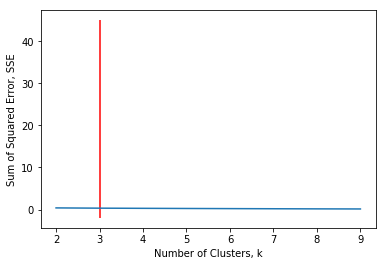

In [108]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# SSE is initialize with empty values
# n_clusters is the "k" 
sse = {}
for n_cluster1 in range(2, 10):
    kmeans1 = KMeans(n_clusters = n_cluster1, max_iter = 500).fit(se_grouped_clustering)
    se_grouped_clustering["clusters"] = kmeans1.labels_
    
    # The inertia is the sum of distances of samples to their closest cluster centre
    sse[n_cluster1] = kmeans1.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of Clusters, k")
plt.ylabel("Sum of Squared Error, SSE")
# vertical line
plt.vlines(3, ymin = -2, ymax = 45, colors = 'red')
plt.show()

Depending on the number of iteration (in this case, 500 iterations were used), the number of cluster, `k` is 3.

**2. Silhouette Coefficient**

To find the optimal value of the number of clusters, `k`, the number of clusters is iterated corresponding `Silhouette Coefficient`is calculated for each of the k-values used. The highest Silhouette Coefficient gives the best match to its own cluster. Please see below:

In [109]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for n_cluster2 in range(2, 10):
    kmeans2 = KMeans(n_clusters = n_cluster2, random_state = 0).fit(se_grouped_clustering)
    label2 = kmeans2.labels_
    sil_coeff = silhouette_score(se_grouped_clustering, label2, metric = 'euclidean')
    print("Where n_clusters = {}, the Silhouette Coefficient is {}".format(n_cluster2, sil_coeff))

Where n_clusters = 2, the Silhouette Coefficient is 0.608730605359445
Where n_clusters = 3, the Silhouette Coefficient is 0.6172784816268801
Where n_clusters = 4, the Silhouette Coefficient is 0.6315704623789649
Where n_clusters = 5, the Silhouette Coefficient is 0.671470602400731
Where n_clusters = 6, the Silhouette Coefficient is 0.7448999308331894
Where n_clusters = 7, the Silhouette Coefficient is 0.7806657835319898
Where n_clusters = 8, the Silhouette Coefficient is 0.8769796912971352
Where n_clusters = 9, the Silhouette Coefficient is 0.9331822776212644


From the result, the high the `n_clusters` the better the silhouette coefficient. For this project, a cluster value of 5 will be used.

In [110]:
se_clusters.columns

Index(['Location', 'Borough', 'Postcode', 'Latitude', 'Longitude',
       'Cluster Labels', '1st Most Common Venue', '2nd Most Common Venue',
       '3rd Most Common Venue', '4th Most Common Venue',
       '5th Most Common Venue', '6th Most Common Venue',
       '7th Most Common Venue', '8th Most Common Venue',
       '9th Most Common Venue', '10th Most Common Venue'],
      dtype='object')

#### 3.2.6 Visualizing the Resulting Clusters

In [111]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(se_clusters['Latitude'], se_clusters['Longitude'], se_clusters['Location'], se_clusters['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

display(map_clusters)

**Cluster 1**

In [112]:
se_clusters.loc[se_clusters['Cluster Labels'] == 0, se_clusters.columns[[1] + list(range(5, se_clusters.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Southwark,0,Coffee Shop,Café,Pub,Hotel,Theater,Italian Restaurant,Park,Bar,Art Gallery,Pizza Place
6,Southwark,0,Coffee Shop,Café,Pub,Hotel,Theater,Italian Restaurant,Park,Bar,Art Gallery,Pizza Place
7,Southwark,0,Coffee Shop,Café,Pub,Hotel,Theater,Italian Restaurant,Park,Bar,Art Gallery,Pizza Place
8,Southwark,0,Coffee Shop,Pub,Hotel,Italian Restaurant,Theater,Cocktail Bar,Bakery,Art Museum,Street Food Gathering,Music Venue
18,Lambeth,0,Coffee Shop,Pub,Hotel,Italian Restaurant,Theater,Cocktail Bar,Bakery,Art Museum,Street Food Gathering,Music Venue
22,Southwark,0,Coffee Shop,Pub,Café,Italian Restaurant,Theater,Hotel,Cocktail Bar,Pizza Place,Art Gallery,Bakery
23,Southwark,0,Coffee Shop,Pub,Café,Italian Restaurant,Theater,Hotel,Cocktail Bar,Pizza Place,Art Gallery,Bakery
30,Southwark,0,Coffee Shop,Pub,Hotel,Italian Restaurant,Theater,Cocktail Bar,Bakery,Art Museum,Street Food Gathering,Music Venue


**Clusters 2**

In [113]:
se_clusters.loc[se_clusters['Cluster Labels'] == 1, se_clusters.columns[[1] + list(range(5, se_clusters.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Lewisham,1,Pub,Coffee Shop,Café,Park,Gastropub,Bar,Cocktail Bar,Italian Restaurant,Bakery,Restaurant
2,Lewisham,1,Pub,Café,Coffee Shop,Park,Bar,Italian Restaurant,Garden,Vietnamese Restaurant,Brewery,Cocktail Bar
3,Southwark,1,Pub,Grocery Store,Café,Park,Coffee Shop,Bakery,Train Station,Pizza Place,Farmers Market,Brewery
9,Lewisham,1,Pub,Grocery Store,Café,Coffee Shop,Supermarket,Park,Gym / Fitness Center,Forest,Japanese Restaurant,Fast Food Restaurant
10,Lambeth,1,Pub,Coffee Shop,Grocery Store,Café,Park,Train Station,Bakery,Italian Restaurant,Breakfast Spot,Brewery
11,Lambeth,1,Pub,Coffee Shop,Grocery Store,Café,Park,Train Station,Bakery,Italian Restaurant,Breakfast Spot,Brewery
14,Lewisham,1,Pub,Café,Park,Gastropub,Garden,Supermarket,Restaurant,Food Truck,Coffee Shop,Fish & Chips Shop
15,Lewisham,1,Pub,Grocery Store,Café,Coffee Shop,Supermarket,Park,Gym / Fitness Center,Forest,Japanese Restaurant,Fast Food Restaurant
16,Lewisham,1,Pub,Café,Coffee Shop,Park,Gastropub,Food Truck,Fish & Chips Shop,Supermarket,Restaurant,Italian Restaurant
17,Lewisham,1,Pub,Café,Coffee Shop,Park,Gastropub,Food Truck,Fish & Chips Shop,Supermarket,Restaurant,Italian Restaurant


**Cluster 3**

In [114]:
se_clusters.loc[se_clusters['Cluster Labels'] == 2, se_clusters.columns[[1] + list(range(5, se_clusters.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Lewisham,2,Grocery Store,Pub,Café,Park,Italian Restaurant,Supermarket,Gym / Fitness Center,Coffee Shop,Train Station,Fish & Chips Shop
19,Lewisham,2,Grocery Store,Pub,Café,Park,Italian Restaurant,Supermarket,Gym / Fitness Center,Coffee Shop,Train Station,Fish & Chips Shop
45,Lewisham,2,Grocery Store,Pub,Café,Park,Italian Restaurant,Supermarket,Gym / Fitness Center,Coffee Shop,Train Station,Fish & Chips Shop


**Cluster 4**

In [115]:
se_clusters.loc[se_clusters['Cluster Labels'] == 3, se_clusters.columns[[1] + list(range(5, se_clusters.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
26,Lewisham,3,Grocery Store,Park,Supermarket,Pub,Fast Food Restaurant,Coffee Shop,Italian Restaurant,Café,Train Station,Gas Station
29,Croydon,3,Pub,Grocery Store,Supermarket,Tram Station,Café,Platform,Coffee Shop,Park,Train Station,Hotel
31,Croydon,3,Pub,Grocery Store,Supermarket,Tram Station,Café,Platform,Coffee Shop,Park,Train Station,Hotel
32,Lewisham,3,Grocery Store,Park,Supermarket,Pub,Fast Food Restaurant,Coffee Shop,Italian Restaurant,Café,Train Station,Gas Station
44,Lewisham,3,Grocery Store,Park,Supermarket,Pub,Fast Food Restaurant,Coffee Shop,Italian Restaurant,Café,Train Station,Gas Station


**Cluster 5**

In [116]:
se_clusters.loc[se_clusters['Cluster Labels'] == 4, se_clusters.columns[[1] + list(range(5, se_clusters.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Southwark,4,Café,Coffee Shop,Park,Pub,Italian Restaurant,Cocktail Bar,Pizza Place,Bar,Beer Bar,Middle Eastern Restaurant
4,Southwark,4,Pub,Café,Italian Restaurant,Park,Pizza Place,Gastropub,Coffee Shop,Restaurant,Burger Joint,Gym / Fitness Center
13,Lambeth,4,Coffee Shop,Pub,Café,Pizza Place,Market,Park,Brewery,Restaurant,Caribbean Restaurant,Indie Movie Theater
24,Southwark,4,Pub,Café,Pizza Place,Park,Coffee Shop,Gastropub,Indie Movie Theater,Italian Restaurant,Bar,Art Gallery
25,Lambeth,4,Café,Hotel,Park,Pub,Bar,Theater,Coffee Shop,Sandwich Place,Gay Bar,Street Food Gathering
27,Southwark,4,Pub,Café,Pizza Place,Park,Coffee Shop,Gastropub,Indie Movie Theater,Italian Restaurant,Bar,Art Gallery
28,Southwark,4,Pub,Brewery,Coffee Shop,Park,Bar,Gym / Fitness Center,Vietnamese Restaurant,Beer Bar,Café,Bakery
34,Southwark,4,Pub,Brewery,Coffee Shop,Park,Bar,Gym / Fitness Center,Vietnamese Restaurant,Beer Bar,Café,Bakery
35,Lambeth,4,Coffee Shop,Pub,Café,Grocery Store,Park,Brewery,Bakery,Pizza Place,Restaurant,Indian Restaurant
36,Lambeth,4,Coffee Shop,Pub,Café,Grocery Store,Park,Brewery,Bakery,Pizza Place,Restaurant,Indian Restaurant


## 4. Result

The following are the highlights of the 5 clusters above:

1. Pubs, Cafe, Coffee Shops are popular in the South East London.
2. As for restaurants, the Italian Restaurants are very popular in the South East London area. Especially in Southwark and Lambeth areas.
3. With the Lewisham area being the most condensed area of Africans in the South East Area, it is surprising to see how in the top 10 venues, you can barely see restaurants in the top 5 venues.
4. Although, the Clusters have variations, a very visible presence is the predominance of pubs.


## 5. Discussion and Conclusion

It is very important to note that Clusters 2 and 3 are the most viable clusters to create a brand African Restaurant. Their proximity to other amenities and accessibility to station are paramount. These 2 clusters do not have top restaurants that could rival their standards if they are created. And the proximity to resources needed is paramount as Lewisham and Lambeth are not far out from Peckham (under Southwark).

In conclusion, this project would have had better results if there were more data in terms of crime data within the area, traffic access and allowance of more venues exploration with the Foursquare (limited venues for free calls).

Also, getting the ratings and feedbacks of the current restaurants within the clusters would have helped in providing more insight into the best location.

<a id='part6'></a>